## 1.1. Getting Started

<div class="alert alert-info">

**Note:** We assume the spectrochemistry package has been properly installed - if not please go to ``install``

</div>

### 1.1.1. Introduction

Before using the package, we need to load the **API (Application Programming Interface)**

The simplest way is to import all the objects and methods at once into your python namespace.

In [1]:
from spectrochempy import *

SpectroChemPy's API - v.0.1a5.dev2+ge944c9bd.d20190111
© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


but you can also import method only when it is needed.

For instances, one object very usefull in the following will be a nd-dataset to contain some data. Instead of issuing the previous command, one can do:

In [2]:
from spectrochempy import NDDataset
mydataset = NDDataset()

In the second line we have defined a new empty instance of **NDDataset**, wich will be further use to load our data.

Another way to proceed is to not mix the API namespace with your normal python. 

In this case, you can simply do:


In [3]:
import spectrochempy as sc
mydataset = sc.NDDataset()

As such, the above command ``from spectrochempy import *``, lead to import of several objects and methods in the namespace.

To get a list of all available methods or objects, type the following command (*remove the leading #, first*):

In [4]:
# APIref

If something goes wrong with during a cell execution,  a ``traceback`` is displayed.

For instance, the object or method ``toto`` does not exist in the API, so an error (**ImportError**) is generated when trying to import this from the API. Here we catch the error with a try except structure

In [5]:
try:
    from spectrochempy import toto
except ImportError as e:
    log.error("OOPS, THAT'S AN IMPORT ERROR! : %s"%e)

[SpectroChemPy] ERROR | OOPS, THAT'S AN IMPORT ERROR! : cannot import name 'toto' from 'spectrochempy' (/Users/spectrocat/Dropbox/spectrochempy/spectrochempy/__init__.py)


The error will stop the execution if not catched.

This is a basic behavior of python : on way to avoid. stoppping the execution without displaying a message is :

In [6]:
try:
    from spectrochempy import toto
except:
    pass

### 1.1.2. Configuration

Many options of the API can be set up

In [7]:
set_loglevel(INFO)

In the above cell, we have set the **log** level to display ``info`` messages, such as this one:

In [8]:
log.info('this is an info message!')
log.debug('this is a debug message!')

this is an info message!


Only the info message is displayed, as expected.

If we change it to ``DEBUG``, we should get the two messages

In [9]:
set_loglevel(DEBUG)

log.info('this is an info message!')
log.debug('this is a debug message!')

[application.py-_log_level_changed DEBUG] changed default log_level to DEBUG
[<ipython-input-9-ef0a7a37be7a>-<module> INFO] this is an info message!
[<ipython-input-9-ef0a7a37be7a>-<module> DEBUG] this is a debug message!


Let's now come back to a standard level of message for the rest of the Tutorial.

In [10]:
set_loglevel(WARNING)

log.info('this is an info message!')
log.debug('this is a debug message!')
log.warning('this is a warning message!')

this is a warning message!


### 1.1.3. Access to scientific libraries

Several libraries are imported with **SpectroChemPy** (so you don't need to re-import them):

- **np** :  This is actually the **`numpy`** library, to perform numerical calculation on nD arrays. 
- **plt** : This is the **`matplotlib`** library, to allow plotting data 

Optionally, **scipy** and **sympy** can be available, if **SpectroChempy** can find these libraries installed on your system.

<IPython.core.display.Javascript object>


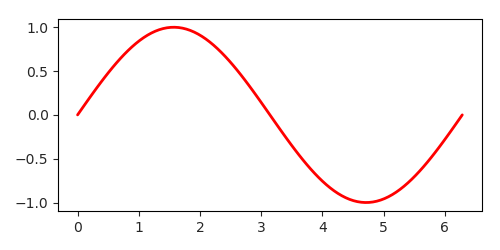

In [11]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.figure(figsize=(5,2.5))
p, = plt.plot(x,y)
p.set_linewidth(2)
p.set_color('red')
plt.show()

### 1.1.4. Units, uncertainties and measurements

The objets **ur**, **Quantity** and **Measurement**, allows the manipulation of data with units and uncertainties. (see tutorial-1-units-uncertainties)

* **ur**: the unit registry
* **Quantity**: a scalar or an array with some units
* **Measurement**: a scalar with units and unertainty

In [12]:
ur.cm / ur.s

<Unit('centimeter / second')>

In [13]:
x = Quantity(10., 'km')
x * 2.

<Quantity(20.0, 'kilometer')>

In [14]:
xa = Quantity(np.array((1,2)), 'km')
xa[1] * 2.5

<Quantity(5.0, 'kilometer')>

In [15]:
y = Measurement(10, .1, 'km')
y  

<Measurement(10.00, 0.10, kilometer)>

In [16]:
z = x.plus_minus(.01)
z

<Measurement(10.00, 0.01, kilometer)>

**Warning**, this is not available for numpy.array based quantities !  For this we will use NDDataset described 
below

In [17]:
try:
    za = xa.plus_minus(.01)
except AttributeError as e:
    log.error(e)

'numpy.ndarray' object has no attribute 'strip'


More information are given in the section [4.1. units and uncertainties](4.1_units_and_uncertainties.ipynb)

## 1.2. NDDataset, the main object

NDDataset is a python object, actually a container, which can represent most of your multidimensional spectroscopic data.

For instance, in the following we read data from a series of FTIR experiments, provided  by the OMNIC software:

In [18]:
nd = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))

Note that for this example, we use data stored in a ``test`` directory. For your own usage, you probably have to give the full pathname (see ... for the way to overcome this using `preferences` setting)

### 1.2.1. Display dataset information

Several ways are available to display the data we have jsut read and that are now stored in the ``source`` dataset 

* **Printing** them, using the print function of python to get a text version of the `source` information

In [19]:
print(nd)

      name/id: NH4Y-activation.SPG
       author: spectrocat@cf-macbookpro.local
      created: 2019-01-11 16:08:18.652119
last modified: 2019-01-11 16:08:18.652119
  description: Dataset from spg file : NH4Y-activation.SPG
               History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)
      history: 2019-01-11 16:08:18.640973:read from spg file
               sorted
   data title: Absorbance
   data shape: 55 x 5549
  data values:
         [[   2.057    2.061 ...    2.013    2.012]
          [   2.033    2.037 ...    1.913    1.911]
          ...
          [   1.794    1.791 ...    1.198    1.198]
          [   1.816    1.815 ...    1.240    1.238]] a.u.
 y-coordinate:
               title: Acquisition timestamp (gmt)
                data: [1467831794.000 1467832394.000 ... 1467864197.000 1467864797.000] s
              labels: [[2016-07-06 19:03:14+00:00 2016-07-06 19:13:14+00:00 ... 2016-07-07 04:03:17+00:00 2016-07-07 04:13:17+00:00]
          [vz0466.

* **Displaying html**, inside a jupyter notebook, by just typing the name of the dataset (must be the last instruction of a cell, however!)

In [20]:
nd

NDDataset: [[   2.057,    2.061, ...,    2.013,    2.012],
            [   2.033,    2.037, ...,    1.913,    1.911],
            ...,
            [   1.794,    1.791, ...,    1.198,    1.198],
            [   1.816,    1.815, ...,    1.240,    1.238]] a.u.

### 1.2.2. Plotting a dataset

Let's plot first a 1D spectrum (for instance one row of nd)

<IPython.core.display.Javascript object>


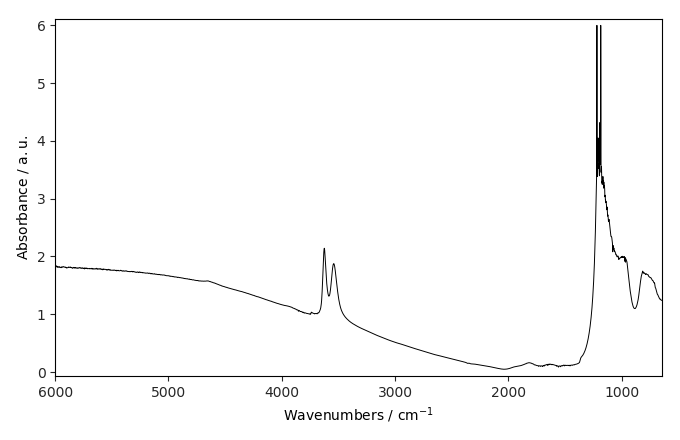

In [21]:
row = nd[-1]
_ = row.plot()

<IPython.core.display.Javascript object>


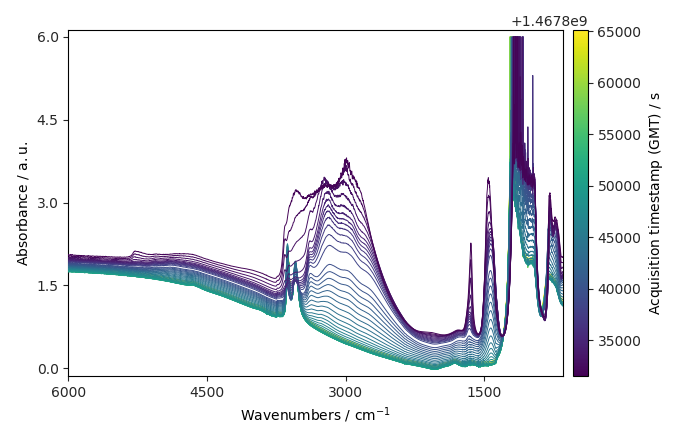

In [22]:
_ = nd.plot(method='stack') # or nd.plot_stack()

or as a contour plot: 

<IPython.core.display.Javascript object>


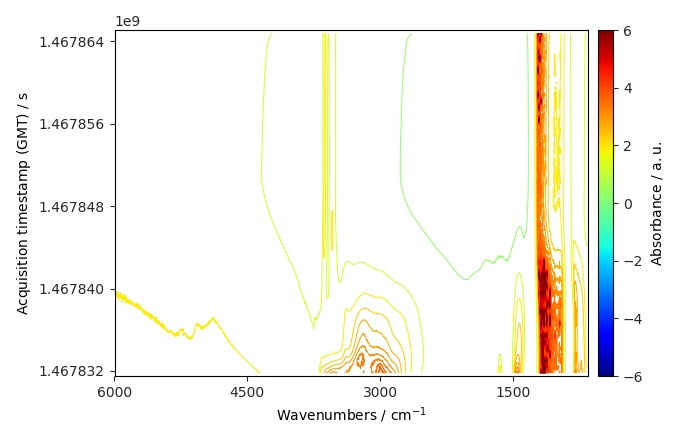

In [23]:
_ = nd.plot(method='map')

Note that as we plot wavenumbers as abcissa, by convention the coordinates dirtection is reversed.

This can be changed by using the keyword argument `reversed` = `False`.

### 1.2.3. Processing a dataset

Some arithmetic can be performed on such dataset. Here is an example where we subtract one reference spectrum to the whole nddataset that we have read above (`nd`).

Lets take, e.g., the last row as reference

<IPython.core.display.Javascript object>


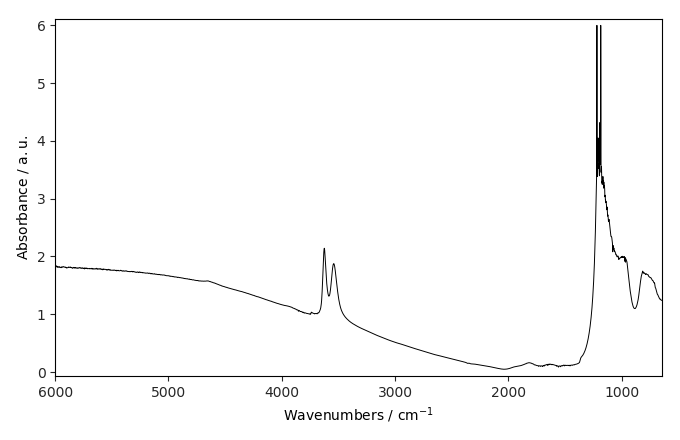

In [24]:
ref = nd[-1]
_ = ref.plot() 

Now suppress this ref spectrum to all other spectra of the whole dataset

<IPython.core.display.Javascript object>


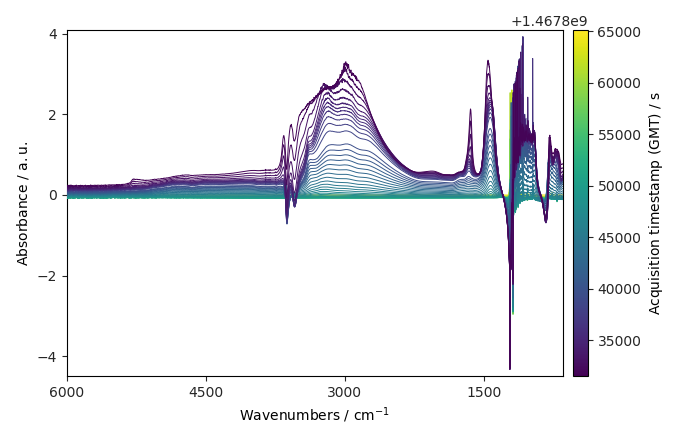

In [25]:
nds = nd - ref  
_ = nds.plot(method='stack')

More details on available on available processing and analysis function will be given later in this user guide.
